In [1]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Flatten, Dense
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import backend as K
from keras import initializers
import keras

import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os import system
import os
import random

import imageio

Using TensorFlow backend.


In [3]:
averaging_kernel_weight_9x9 = 1./81
averaging_kernel_weight_5x5 = 1./25
averaging_kernel_weight_3x3 = 1./9

image = imageio.imread("./images/briefs_gray.bmp")
input_patch_size = 56  # such that, after the average-blurring convolutions, it gets down to 48
centre_coord_offset = 23

patch = image[96: 96 + input_patch_size, 68: 68 + input_patch_size]
patch_with_chnl_dim = np.expand_dims(patch, axis=-1)
print(patch_with_chnl_dim.shape)
patches = np.expand_dims(patch_with_chnl_dim, axis=0)
print(patches.shape)

(56, 56, 1)
(1, 56, 56, 1)


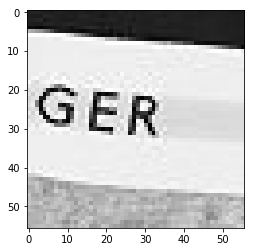

In [4]:
plt.imshow(patch, cmap='gray')

In [5]:
input_shape = (input_patch_size, input_patch_size, 1)
input_img = Input(shape=input_shape)

average_blurred = Conv2D(1, (9, 9), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_9x9), bias_initializer=keras.initializers.Zeros(), trainable=False)(input_img)

blurrer = Model(input_img, average_blurred)

blurrer.compile(optimizer='adadelta', loss="binary_crossentropy")
blurrer.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 56, 56, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 1)         82        
Total params: 82
Trainable params: 0
Non-trainable params: 82
_________________________________________________________________


In [6]:
input_shape = (input_patch_size, input_patch_size, 1)
input_img = Input(shape=input_shape)

x = Conv2D(1, (5,5), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_5x5), bias_initializer=keras.initializers.Zeros(), trainable=False)(input_img)
average_blurred = Conv2D(1, (5,5), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_5x5), bias_initializer=keras.initializers.Zeros(), trainable=False)(x)

blurrer_2conv = Model(input_img, average_blurred)

blurrer_2conv.compile(optimizer='adadelta', loss="binary_crossentropy")
blurrer_2conv.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 56, 56, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 1)         26        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 1)         26        
Total params: 52
Trainable params: 0
Non-trainable params: 52
_________________________________________________________________


In [7]:
input_shape = (input_patch_size, input_patch_size, 1)
input_img = Input(shape=input_shape)

x = Conv2D(1, (3,3), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_3x3), bias_initializer=keras.initializers.Zeros(), trainable=False)(input_img)
x = Conv2D(1, (3, 3), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_3x3), bias_initializer=keras.initializers.Zeros(), trainable=False)(x)
x = Conv2D(1, (3, 3), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_3x3), bias_initializer=keras.initializers.Zeros(), trainable=False)(x)
average_blurred = Conv2D(1, (3, 3), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_3x3), bias_initializer=keras.initializers.Zeros(), trainable=False)(x)

blurrer_4conv = Model(input_img, average_blurred)

blurrer_4conv.compile(optimizer='adadelta', loss="binary_crossentropy")
blurrer_4conv.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 56, 56, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 54, 54, 1)         10        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 1)         10        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 1)         10        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 1)         10        
Total params: 40
Trainable params: 0
Non-trainable params: 40
_________________________________________________________________


(48, 48)


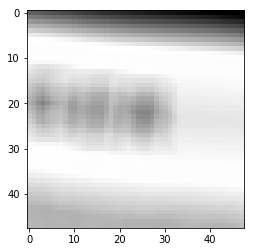

In [8]:
patch_blurred_9x9 = blurrer.predict(patches)[0, :, :, 0]
print(patch_blurred_9x9.shape)
plt.imshow(patch_blurred_9x9, cmap='gray')
plt.show()

(48, 48)


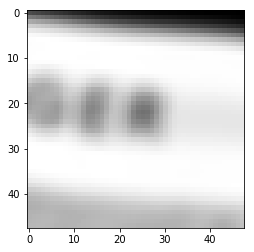

In [9]:
patch_blurred_5x5 = blurrer_2conv.predict(patches)[0, :, :, 0]
print(patch_blurred_5x5.shape)
plt.imshow(patch_blurred_5x5, cmap='gray')
plt.show()

(48, 48)


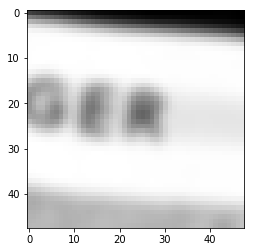

In [10]:
patch_blurred_3x3 = blurrer_4conv.predict(patches)[0, :, :, 0]
print(patch_blurred_3x3.shape)
plt.imshow(patch_blurred_3x3, cmap='gray')
plt.show()

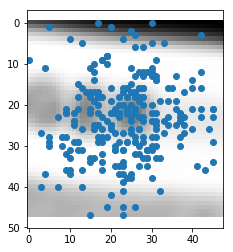

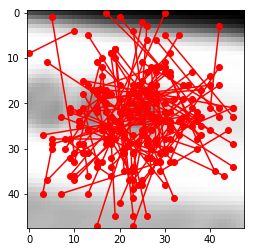

In [21]:
file1 = open('./opencv_test_points/generated_16.txt', 'r') 
count = 0


x_coords = []
y_coords = []
 
while True: 
    count += 1
    line = file1.readline() 
  
    if not line: 
        break

    x_coord = int(line[1: line.find(",")]) + 23
    y_coord = int(line[line.find(",") + 1: -2]) + 23
    x_coords.append(x_coord)
    y_coords.append(y_coord)
#     print(x_coord, y_coord)
file1.close() 


plt.imshow(patch_blurred_5x5, cmap='gray')
plt.scatter(x_coords, y_coords)
plt.show()

plt.imshow(patch_blurred_5x5, cmap='gray')
for i in range(0, len(x_coords), 2):
    plt.plot(x_coords[i:i+2], y_coords[i:i+2], 'ro-')

plt.show()

In [ ]:
# save figures for easier explanation on how BRIEF works

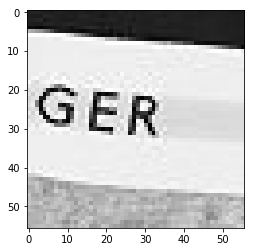

In [25]:
plt.imshow(patch, cmap='gray')
plt.savefig("./images/brief_visualisation_0input.png")

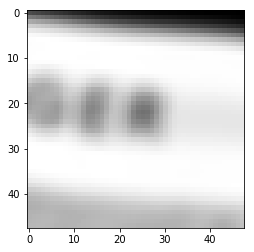

In [26]:
plt.imshow(patch_blurred_5x5, cmap='gray')
plt.savefig("./images/brief_visualisation_1averageblurring.png")

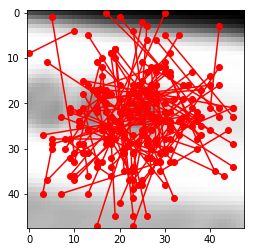

In [28]:
plt.imshow(patch_blurred_5x5, cmap='gray')
for i in range(0, len(x_coords), 2):
    plt.plot(x_coords[i:i+2], y_coords[i:i+2], 'ro-')

plt.savefig("./images/brief_visualisation_2binarytests.png")

In [25]:
def binary_pixel_tests(patch_blurred):

    file = open('./opencv_test_points/generated_64.txt', 'r') 
    count = 0

    x_coord = 0
    y_coord = 0

    descr = []

    while True:
        line = file.readline()
        if not line: 
            break

        x_coord_prev = x_coord
        y_coord_prev = y_coord

        x_coord = int(line[1: line.find(",")])
        y_coord = int(line[line.find(",") + 1: -2])

        if count % 2 == 1:
            if patch_blurred[x_coord_prev + centre_coord_offset, y_coord_prev + centre_coord_offset] < patch_blurred[x_coord + centre_coord_offset, y_coord + centre_coord_offset]:
#                 print("1", end=',')
                descr.append(1)
            else:
#                 print("0", end=',')
                descr.append(0)

        count += 1
    file.close()

    descr = np.array(descr)
    return descr


In [36]:
descr_9x9 = binary_pixel_tests(patch_blurred_9x9)
descr_5x5 = binary_pixel_tests(patch_blurred_5x5)
descr_3x3 = binary_pixel_tests(patch_blurred_3x3)

In [31]:
temp_descr1 = np.array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0], dtype=np.uint8)

temp_descr2 = np.array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0], dtype=np.uint8)


In [37]:
print(np.count_nonzero(descr_9x9 - temp_descr1))
print(np.count_nonzero(descr_9x9 - temp_descr2))

print(np.count_nonzero(descr_5x5 - temp_descr1))
print(np.count_nonzero(descr_5x5 - temp_descr2))

print(np.count_nonzero(descr_3x3 - temp_descr1))
print(np.count_nonzero(descr_3x3 - temp_descr2))


122
97
126
101
123
100


In [51]:
### playing with a toy model and figuring out how to generate weights for the dense layer

In [52]:
toy_weights = np.zeros((3,2))
toy_weights[0,0] = 1
toy_weights[1,0] = -1
toy_weights[0,1] = 1
toy_weights[2,1] = -1

print(toy_weights)

[[ 1.  1.]
 [-1.  0.]
 [ 0. -1.]]


In [55]:
# input: input_dimension, and pairs of one-dimensional array
# output: weights

input_dimension = 3  # random testing number
indices1 = list([0,0])
indices2 = list([1,2])

###

weights = np.zeros((input_dimension, len(indices1)), dtype = np.float32)

output_count = 0
for (index1, index2) in zip(indices1, indices2):
    weights[index1, output_count] = 1
    weights[index2, output_count] = -1
    
    output_count += 1

print(weights)

[[ 1.  1.]
 [-1.  0.]
 [ 0. -1.]]


In [56]:
# input: pixel coordinates of a patch
# output: input weight indices

toy_patch = np.random.rand(10, 10)

x_coord = 6
y_coord = 2

###

ind = np.ravel_multi_index((x_coord, y_coord), toy_patch.shape)

###

toy_patch_flattened = toy_patch.flatten()
print(toy_patch[x_coord, y_coord])
print(toy_patch_flattened[ind])

0.14928202448803385
0.14928202448803385


In [57]:
# toy_weights = np.array([1,4,2,5,3,6]).reshape(3,2)

toy_input = Input(shape=(3,))

# toy_output = Dense(2, activation="sigmoid", kernel_initializer=initializers.Constant(1.0), bias_initializer=keras.initializers.Zeros(), trainable=False)(toy_input)
toy_output = Dense(2, activation="sigmoid", weights=[toy_weights, np.zeros(2)], trainable=False)(toy_input)

toy_model = Model(toy_input, toy_output)

toy_model.compile(optimizer='adadelta', loss="binary_crossentropy")
toy_model.summary()

print(toy_model.get_layer(index=1).get_weights())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
Total params: 8
Trainable params: 0
Non-trainable params: 8
_________________________________________________________________
[array([[ 1.,  1.],
       [-1.,  0.],
       [ 0., -1.]], dtype=float32), array([0., 0.], dtype=float32)]


In [58]:
toy = np.array([10, 100, 0])
# toy_with_chnl_dim = np.expand_dims(patch, axis=-1)
toys = np.expand_dims(toy, axis=0)
toy_preditction = toy_model.predict(toys)
print(toy_preditction)

[[0.        0.9999546]]
